In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
%matplotlib inline

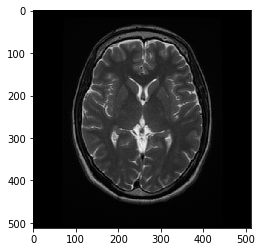

In [5]:
image = cv2.imread('images/brain_MR.jpg')
image_copy = np.copy(image)
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)

plt.imshow(image_copy)

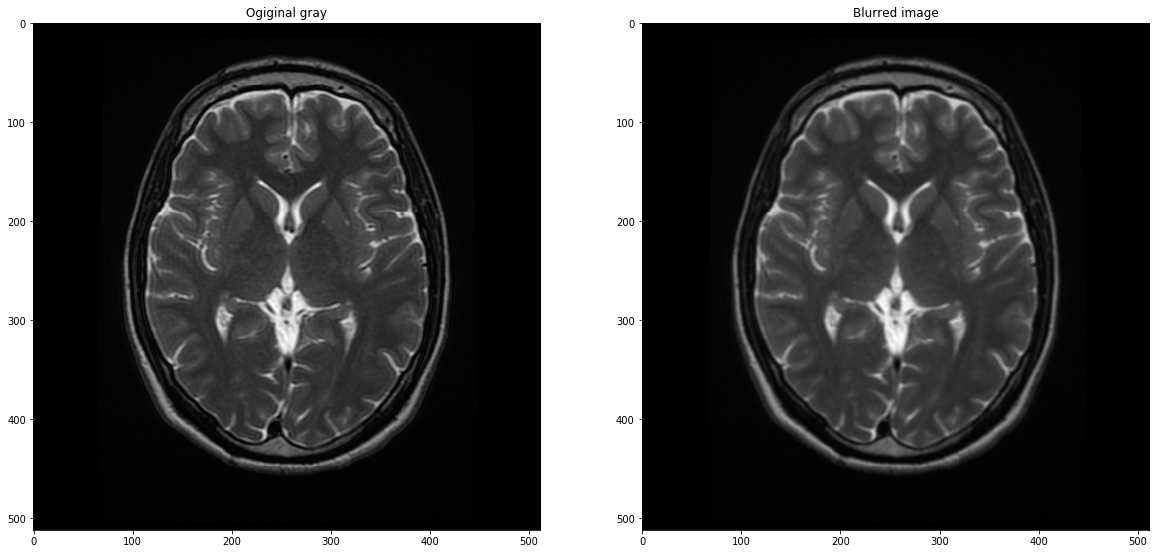

In [6]:
# Gaussian Blur Image
gray = cv2.cvtColor(image_copy, cv2.COLOR_RGB2GRAY)
#create a gaussian Blur
gray_blur = cv2.GaussianBlur(gray, (5, 5), 0)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

ax1.set_title('Ogiginal gray')
ax1.imshow(gray, cmap='gray')

ax2.set_title('Blurred image')
ax2.imshow(gray_blur, cmap='gray')

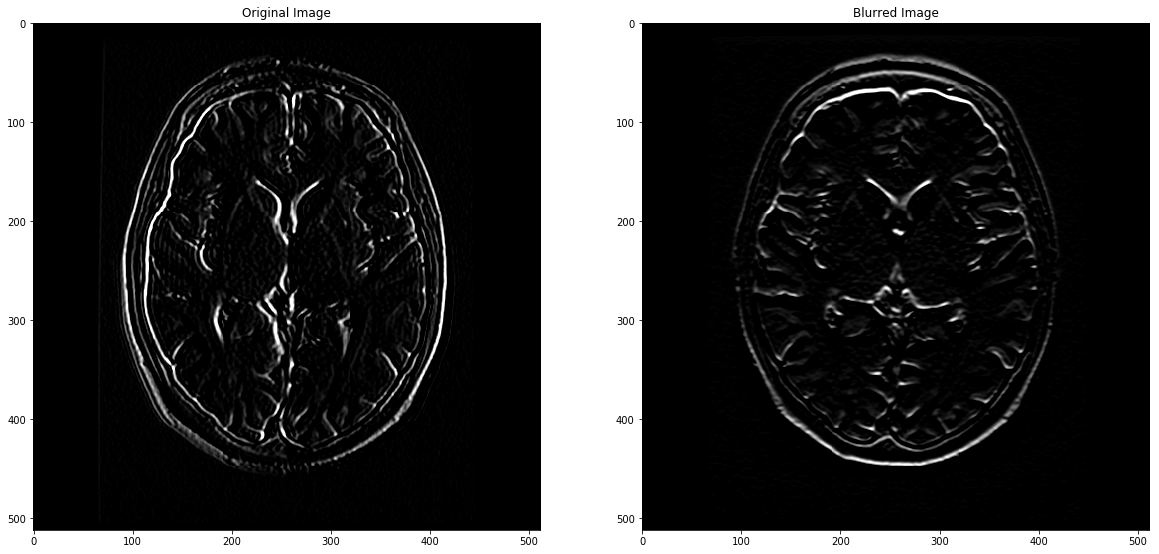

In [7]:
# Test performance with High Pass Filter
# 3x3 sobel filter for edge detection
sobel_x = np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]])
sobe1_y = np.array([[-1, -2, -1],
                   [0 , 0, 0],
                   [1, 2, 1]])
#filter the original image
filtered = cv2.filter2D(gray, -1, sobel_x)

filtered_blurred = cv2.filter2D(gray_blur, -1, sobe1_y)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

ax1.set_title('Original Image')
ax1.imshow(filtered, cmap='gray')

ax2.set_title('Blurred Image')
ax2.imshow(filtered_blurred, cmap='gray')

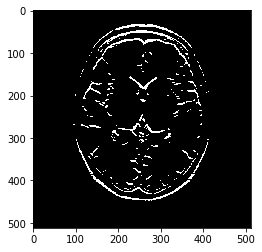

In [13]:
#create a threshold that sets all the filtered pixels to white
# Above a certain threshold

retval, binary_image = cv2.threshold(filtered_blurred, 50, 255, cv2.THRESH_BINARY)
plt.imshow(binary_image, cmap='gray')